In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1.Price Prediction for Appartment

In [2]:
app = 'df_cleanappart.csv'
df_appart= pd.read_csv(app, sep = ',')
df = pd.DataFrame(df_appart)

In [3]:
df_appart= pd.get_dummies(df_appart, columns=['type','province', 'epcScore','subtype','buildingCondition'], drop_first=True)
print(df_appart.head(10))
print(df_appart.dtypes)

   bedroomCount  bathroomCount  postCode  habitableSurface  facedeCount  \
0           2.0            1.0      1040             100.0          1.0   
1           2.0            1.0      1040              87.0          2.0   
2           2.0            2.0      1040             104.0          2.0   
3           1.0            1.0      1040              71.0          2.0   
4           2.0            1.0      1040              90.0          2.0   
5           3.0            2.0      1040             220.0          2.0   
6           3.0            2.0      1040             220.0          2.0   
7           2.0            1.0      1040             187.0          2.0   
8           1.0            1.0      1040              93.0          2.0   
9           2.0            1.0      1040             120.0          2.0   

   hasTerrace     price  price_per_m2  province_Brussels  \
0           1  399000.0       3990.00               True   
1           1  465000.0       5344.83               Tr

In [ ]:
# categorical transformer
#categorical_features = ['type', 'province', 'epcScore', 'subtype', 'buildingCondition']
#numerical_features = [col for col in df_appart.columns if col != 'price' and col not in categorical_features]

#cat_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')
#numerical_transformer = StandardScaler()

#preprocessor = ColumnTransformer(
    #transformers=[
        #('num', numerical_transformer, numerical_features),
        #('cat', cat_transformer, categorical_features)],
    #remainder='passthrough') # for other columns non-specific


In [41]:
# 1. Create model GradientBoostingRegressor
#model_gbr = GradientBoostingRegressor(n_estimators=100,      # Number of tree to build
                                      #learning_rate=0.1,     # learning rate
                                      #max_depth=3,           # tree depth
                                      #random_state=42)
appmodel_gbr = GradientBoostingRegressor(n_estimators=100,      
                                      learning_rate=0.1,    
                                      max_depth=5,           
                                      random_state=42)

# 2. Create Pipeline : 
pipeline_appart = Pipeline(steps=[('regressor',appmodel_gbr)])

# 3. Prepare data for pipeline : 
X = df_appart.drop('price', axis=1)
y = df_appart['price']

#save the columns model for futures predictions
model_columns = X.columns

# 4. Test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
# 1. Train model GradientBoostingRegressor
pipeline_appart.fit(X_train, y_train)

# 2. Prediction on xtest
y_pred_gbr = pipeline_appart.predict(X_test)

# 3. Model evaluation
mse = mean_squared_error(y_test, y_pred_gbr)
MAE = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"MAE: {MAE:.2f}")
print(f"RMSE: {mse**0.5:.2f}")
print(f"R² score : {r2:.2f}")

MAE: 7671.74
RMSE: 25345.26
R² score : 1.00


In [14]:
# Comapre with the standard deviation if RMSE is acceptable: 
appart_price = df_appart['price']
stdprice_appart = np.std(appart_price)

print(f"Std deviation for appartment : {stdprice_appart:.2f} €")
# ! Distribution is not "normal"

Std deviation for appartment : 389687.03 €


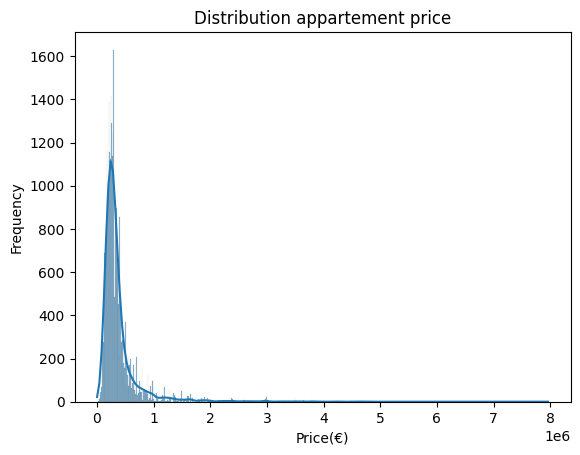

In [15]:
sns.histplot(df_appart['price'], kde=True)
plt.title('Distribution appartement price')
plt.xlabel('Price(€)')
plt.ylabel('Frequency')
plt.show()

#### regarding the subtype distribution of appartment type, there are 75% of appartment subtype

In [16]:
iqr_price = df_appart['price'].quantile(0.75) - df_appart['price'].quantile(0.25)
Appart_price = df_appart['price']
median_price = df_appart['price'].median()
mean_price = df_appart['price'].mean()
absolute_dev = np.abs(Appart_price - median_price)
mad_price = np.median(absolute_dev)


print(f"iqr price : {iqr_price:.2f} €")
print(f"mad price : {mad_price:.2f} €")
print(f"median price : {median_price:.2f} €")
print(f"mean price : {mean_price:.2f} €")

iqr price : 180000.00 €
mad price : 86847.50 €
median price : 285847.50 €
mean price : 382981.85 €


In [17]:
minapp = df_appart['price'].min()
maxapp = df_appart['price'].max()

#rmse = 34836.92  # calculated in model
rmse = 25339.49

rmse_range = (rmse / (maxapp - minapp)) * 100
rmse_median = (rmse / median_price) * 100

print(f"min price: {minapp:.2f}€")
print(f"max price: {maxapp:.2f}€")
print(f"RMSE in range price : {rmse_range:.2f}%")
print(f"RMSE in median price : {rmse_median:.2f}%")

min price: 3200.00€
max price: 7960000.00€
RMSE in range price : 0.32%
RMSE in median price : 8.86%


### Test prediction with sample

# 2. Price prediction for House

In [18]:
house = 'df_cleanhouse.csv'
df_house = pd.read_csv(house, sep = ',')
df_house = pd.DataFrame(df_house)

In [19]:
df_house= pd.get_dummies(df_house, columns=['type','province', 'epcScore','subtype','buildingCondition'], drop_first=True)
print(df_house.head(10))
print(df_house.dtypes)

   bedroomCount  bathroomCount  postCode  habitableSurface  facedeCount  \
0           4.0            2.0      1040             270.0          2.0   
1           4.0            2.0      1040             375.0          2.0   
2           3.0            0.0      1040             277.0          2.0   
3           6.0            2.0      1040             330.0          2.0   
4           3.0            1.0      1040             178.0          2.0   
5           5.0            3.0      1040             240.0          2.0   
6           5.0            3.0      1040             252.0          4.0   
7           6.0            2.0      1040             370.0          2.0   
8           9.0            6.0      1040             528.0          2.0   
9           6.0            5.0      1040             850.0          2.0   

   hasTerrace      price  price_per_m2  province_Brussels  \
0           1   895000.0       3314.81               True   
1           1  1095000.0       2920.00              

In [ ]:
# categorical transformer
#categorical_features = ['type', 'province', 'epcScore', 'subtype', 'buildingCondition']
#numerical_features = [col for col in df_house.columns if col != 'price' and col not in categorical_features]

#cat_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')
#numerical_transformer = StandardScaler()

#preprocessor = ColumnTransformer(
    #transformers=[
        #('num', numerical_transformer, numerical_features),
        #('cat', cat_transformer, categorical_features)],
    #remainder='passthrough') # for other columns non-specific

In [53]:
# 1. Train model GradientBoostingRegressor
#model_gbr = GradientBoostingRegressor(n_estimators=100,      # Number of tree to build
                                      #learning_rate=0.1,     # learning rate
                                      #max_depth=3,           # tree depth
                                      #random_state=42)
housemodel_gbr = GradientBoostingRegressor(n_estimators=700,      # Number of tree to build
                                      learning_rate=0.1,     # learning rate
                                      max_depth=3,           # tree depth
                                      random_state=42)

# 2. Create Pipeline : 
pipeline_house = Pipeline(steps=[('regressor',housemodel_gbr)])

# 3. Prepare data for pipeline : 
X = df_house.drop('price', axis=1)
y = df_house['price']

#save the columns model for futures predictions
model_columns = X.columns

# 4. Test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# 1. Train model GradientBoostingRegressor
pipeline_house.fit(X_train, y_train)

# 2. Prediction on xtest
y_pred_gbr = pipeline_house.predict(X_test)

# 3. Model evaluation
mse = mean_squared_error(y_test, y_pred_gbr)
MAE = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"MAE: {MAE:.2f}")
print(f"RMSE: {mse**0.5:.2f}")
print(f"R² score : {r2:.2f}")

MAE: 11764.08
RMSE: 84778.72
R² score : 0.98


In [22]:
# Comapre with the standard deviation if RMSE is acceptable: 
house_price = df_house['price']
stdprice_house = np.std(house_price)

print(f"Std deviation for house : {stdprice_house:.2f} €")
# ! Distribution is not "normal"

Std deviation for house : 576618.39 €


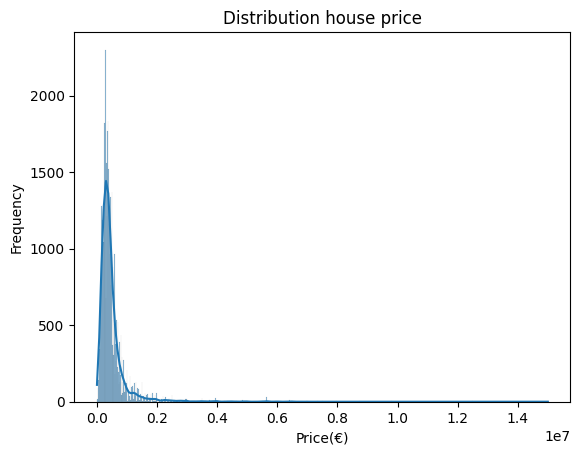

In [23]:
sns.histplot(df_house['price'], kde=True)
plt.title('Distribution house price')
plt.xlabel('Price(€)')
plt.ylabel('Frequency')
plt.show()

In [24]:
iqr_price = df_house['price'].quantile(0.75) - df_appart['price'].quantile(0.25)
house_price = df_house['price']
median_price = df_house['price'].median()
mean_price = df_house['price'].mean()
absolute_dev = np.abs(house_price - median_price)
mad_price = np.median(absolute_dev)


print(f"iqr price : {iqr_price:.2f} €")
print(f"mad price : {mad_price:.2f} €")
print(f"median price : {median_price:.2f} €")
print(f"mean price : {mean_price:.2f} €")

iqr price : 315000.00 €
mad price : 129500.00 €
median price : 369500.00 €
mean price : 492103.43 €


In [25]:
minhouse = df_house['price'].min()
maxhouse = df_house['price'].max()

#rmse = 99495.98 # calculated in model max_depth = 3
#rmse = 101775.18 # max_depth = 5
#rmse = 98017.60 # max_depth = 4
#rmse = 97996.74  #learning_rate = 0.2, max_depth = 4
#rmse = 91226.39 #tree = 200, learning_rate = 0.1, max_depth = 3
#rmse = 85757.97 #tree = 500, learning_rate = 0.1, max_depth = 3
rmse = 84778.72 #tree = 700, learning_rate = 0.1, max_depth = 3

rmse_range = (rmse / (maxhouse - minhouse)) * 100
rmse_median = (rmse / median_price) * 100

print(f"min price: {minhouse:.2f}€")
print(f"max price: {maxhouse:.2f}€")
print(f"RMSE in range price : {rmse_range:.2f}%")
print(f"RMSE in median price : {rmse_median:.2f}%")

min price: 3141.00€
max price: 15000000.00€
RMSE in range price : 0.57%
RMSE in median price : 22.94%
